# Linear Regression
<hr style="border:2px solid black">

## 1. Introduction

### 1.1 What is Linear Regression?

- models a linear relationship between at least one explanatory variable $x$ (feature) and an outcome variable $y$ (target):
$\newline$
$$
y = w_0 + w_1x + \epsilon
$$
$\newline$
where
>- $w_0$ is the intercept or bias
>- $w_1$ is the coefficient or slope
>- $\epsilon$ is randomly distributed error term

- `model equation` is a linear function $\hat{y}(x)$ we fit to the data:    
$\newline$
$$
\hat y = w_0 + w_1 x 
$$
$\newline$
- more generally, when we have more than one features, we are fitting a hyperplane:
$\newline$
$$\hat y = w_0 + w_1 x_1 + w_2 x_2 + ... + w_n x_n
$$
$\newline$

- shorthand linear algebraic notation with a coefficient vector $w$:
$\newline$    
$$
\hat y = X \cdot w^T
$$
$\newline$

### 1.2 How are regression models evaluated?

- In Ordinary Least Squares (OLS) regression, one minimizes the `Mean Squared Error` loss function:
$\newline$
$$ 
MSE = \frac{1}{N}\sum_{i=1}^{N}(y_i-\hat{y}_i)^2
$$ 
$\newline$
- another variant is to minimize the `Mean Absolute Error`:
$\newline$
$$ 
MAE = \frac{1}{N}\sum_{i=1}^{N}|y_i-\hat{y}_i|
$$ 
$\newline$

### 1.3 How to find model parameters?

**`Normal Equation`**
>- can be solved to find the model parameters analytically:
>$\newline$
>$$ 
\hat{w}^T = \frac{X^Ty}{X^TX}
$$ 
>$\newline$
>- time complexity goes like $O(N³)$; becomes very slow for many data points 
>- runs into problem if the features are linearly dependent

**`Gradient Descent`**
>- a good alternative for finding optimal parameters
>- starts with a random guess and performs minimization steps until it reaches optimal values

### 1.4 Goodness of Fit

- coefficient of determination, $R²$, given by the formula:
$\newline$
$$ 
R²~=~1-\frac{RSS}{TSS}~=~1 - \frac{\sum_{i=1}^{N}(y_i-\hat{y}_i)^2}{\sum_{i=1}^{N}(y_i-\bar{y})^2}
$$ 
$\newline$
- gives the fraction of variance in the target variable explained by performing the regression 
    + $R²=1.0$: $\quad$model has a perfect fit – no errors in predictions
    + $R²=0.0$: $\quad$model is no better than a simple average over all points (baseline model)
    + $R²<0.0$: $\quad$worse than a baseline model, possible only for multiple linear regression

<hr style="border:2px solid black">

## 2. Example: Penguin Dataset

**Load packages**

In [24]:
# data analysis stack
import numpy as np
import pandas as pd

# data visualization stack
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# data pre-processing stack
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# machine learning stack
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# miscellaneous
import scipy.stats as ss
import warnings
warnings.filterwarnings("ignore")

**Load data**

In [25]:
df = sns.load_dataset("penguins")
df.dropna(inplace=True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


**quick exploration**

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [27]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


**Features and target variables**

In [28]:
numerical_features = [
    'bill_length_mm',
    'bill_depth_mm',
    'flipper_length_mm'
]

categorical_features = [
    'species',
    'island',
    'sex'
]

features = numerical_features + categorical_features

target_variable = 'body_mass_g'

In [29]:
# feature and target columns
X,y = df[features],df[target_variable]

**Train-test split**

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)
X_train.shape, X_test.shape

((266, 6), (67, 6))

### 2.1 Exploratory Data Analysis

In [31]:
X_train

,bill_length_mm,bill_depth_mm,flipper_length_mm,species,island,sex
314,44.5,14.7,214.0,Gentoo,Biscoe,Female
248,48.2,14.3,210.0,Gentoo,Biscoe,Female
199,49.0,19.6,212.0,Chinstrap,Dream,Male
182,40.9,16.6,187.0,Chinstrap,Dream,Female
238,46.2,14.5,209.0,Gentoo,Biscoe,Female
...,...,...,...,...,...,...
81,42.9,17.6,196.0,Adelie,Torgersen,Male
93,39.6,18.1,186.0,Adelie,Dream,Male
69,41.8,19.4,198.0,Adelie,Torgersen,Male
335,55.1,16.0,230.0,Gentoo,Biscoe,Male


#### correlation among numerical features

<Axes: >

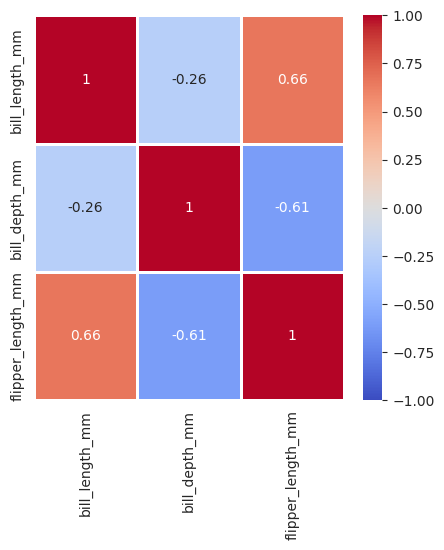

In [33]:
plt.figure(figsize=(5,5),dpi=100)
sns.heatmap(
    data=X_train[numerical_features].corr(),
    cmap='coolwarm',
    linecolor='white',
    linewidth=1,
    annot=True,
    vmin=-1,
    vmax=1
)

#### correlation among categorical features

In [10]:
def cramers_corrected_stat(df,cat_col1,cat_col2):
    """
    This function spits out corrected Cramer's correlation statistic
    between two categorical columns of a dataframe 
    """
    crosstab = pd.crosstab(df[cat_col1],df[cat_col2])
    chi_sqr = ss.chi2_contingency(crosstab)[0]
    n = crosstab.sum().sum()
    r,k = crosstab.shape
    phi_sqr_corr = max(0, chi_sqr/n - ((k-1)*(r-1))/(n-1))    
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    
    result = np.sqrt(phi_sqr_corr / min( (k_corr-1), (r_corr-1)))
    return round(result,3)

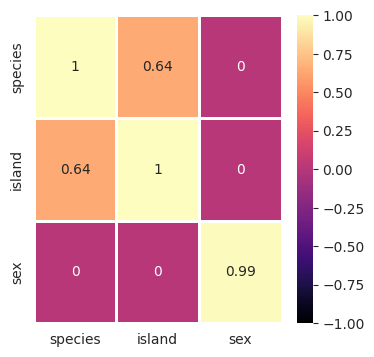

In [11]:
cramer_v_corr = dict(
    zip(
        categorical_features,
        [[cramers_corrected_stat(X_train,f1,f2) for f2 in categorical_features] for f1 in categorical_features]
    )
)

plt.figure(figsize=(4,4),dpi=100)
sns.heatmap(data=pd.DataFrame(data=cramer_v_corr,index=categorical_features),
            cmap='magma',
            linecolor='white',
            linewidth=1,
            annot=True,
            vmin=-1,
            vmax=1
           );

**correlation between categorical and numerical features**

In [12]:
def anova_pvalue(df,cat_col,num_col):
    """
    This function spits out the anova p-value (probability of no correlation) 
    between a categorical column and a numerical column of a dataframe
    """
    CategoryGroupLists = df.groupby(cat_col)[num_col].apply(list)
    AnovaResults = ss.f_oneway(*CategoryGroupLists)
    p_value = round(AnovaResults[1],3)
    return p_value

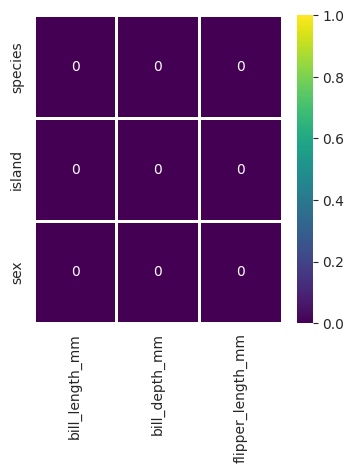

In [14]:
anova_pvalue_dict = dict(
    zip(
        numerical_features,
        [[anova_pvalue(X_train,f1,f2) for f2 in numerical_features] for f1 in categorical_features]
    )
)

plt.figure(figsize=(4,4),dpi=100)
sns.heatmap(data=pd.DataFrame(data=anova_pvalue_dict,index=categorical_features),
            cmap='viridis',
            linecolor='white',
            linewidth=1,
            annot=True,
            vmin=0,
            vmax=1
           );

***Comment: p_value in all the cases < 0.05 implying likely correlation between categorical and numerical features***

### 2.2 Baseline Model

In [15]:
class BaselineModel:
    """
    Baseline model predicting only the mean value of the target variable
    """
    def predict(self,X):
        y_mean = y_train.mean()
        return [y_mean]*X.shape[0]

In [16]:
from sklearn.metrics import r2_score

y_baseline_train_pred = BaselineModel().predict(X_train)
r2 = r2_score(y_train,y_baseline_train_pred)

print(f'baseline model train score: {round(r2,6)}')

baseline model train score: 0.0


In [17]:
y_baseline_pred = BaselineModel().predict(X_test)
r2 = r2_score(y_test,y_baseline_pred)
r2

-0.04526133208117544

In [18]:
print(f'baseline model test score: {round(r2,6)}')


baseline model test score: -0.045261


### 2.3 Model Building

**Feature engineering**

In [19]:
# column transformation
transformer = ColumnTransformer([
    ('scaling', MinMaxScaler(), numerical_features),
    ('onehot', OneHotEncoder(drop='first'), categorical_features)
])

**Model pipeline**

In [20]:
# pipeline
pipeline = Pipeline(
    [('col_transformer', transformer),                  # step-1 column transformation
     ('lr_model', LinearRegression(fit_intercept=True)) # step-2 linear fit
    ])

In [21]:
# model training
pipeline.fit(X_train,y_train)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('scaling', MinMaxScaler(),
                                                  ['bill_length_mm',
                                                   'bill_depth_mm',
                                                   'flipper_length_mm']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['species', 'island',
                                                   'sex'])])),
                ('lr_model', LinearRegression())])

### 2.4 Model Evaluation

In [22]:
# training score
training_score = pipeline.score(X_train,y_train)
print(f'training score: {round(training_score,6)}')

training score: 0.872906


In [23]:
# test score
test_score = pipeline.score(X_test,y_test)
print(f'test score: {round(test_score,6)}')

test score: 0.878288


<hr style="border:2px solid black">

## 3. Assumptions of Linear Regression

### 3.1 Linearity
>- model is linear in the parameters and the error term
>- model may include non-linear varaibles such as polynomials and interactions:
>$\newline$
>$$
y = w_0+w_1x_1+w_2x_2+w_{11}x_1²+w_{22}x_2²+w_{12}x_1x_2+\epsilon
$$
>$\newline$
>- no relevant variables are missing

### 3.2 Zero-Mean Error
>- in order for model to be correct on average (unbiased), the error term must have zero mean
>- assumption easily taken care of by the inclusion of intercept

In [34]:
# predicted values of penguin body mass
X_train['predicted_mass'] = pipeline.predict(X_train)

In [35]:
# residual values
X_train['residual'] = y_train - X_train['predicted_mass']

In [36]:
# mean of residuals
X_train['residual'].mean()

-1.3676612056735762e-14

### 3.3 Strict Exogeneity
>- all independent variables are uncorrelated with the error term
>- in harmony with the notion that the error term represents unpredictable random flactuations

**correlation with numerical features**

In [37]:
for feature in numerical_features:
    pearson_corr = X_train[feature].corr(X_train['residual'])
    print(f'correlation with {feature}: {pearson_corr}')

correlation with bill_length_mm: 8.694785559336223e-17
correlation with bill_depth_mm: 6.641346738814799e-16
correlation with flipper_length_mm: -3.631234114401884e-16


**correlation with categorical features**

In [38]:
for feature in categorical_features:
    p_value = anova_pvalue(X_train,feature,'residual')
    print(f'p_value for {feature}: {p_value}')

p_value for species: 1.0
p_value for island: 1.0
p_value for sex: 1.0


### 3.4 Homoscedasticity
>- the error term has constant variance, i.e., the variance does not change for a range of observations
>- assumption can be checked through residual vs predicted value scatterplot

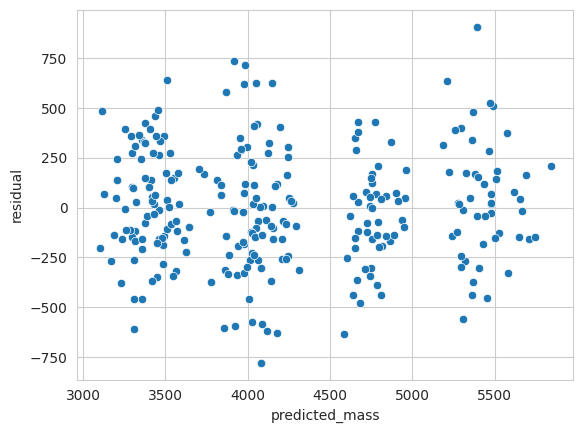

In [39]:
sns.scatterplot(
    data = X_train,
    x = "predicted_mass",
    y = "residual"
);

### 3.5 Full Rank
>- all the features are linearly independent, i.e., no perfect correlation
>- imperfect but strong correlation between features (multicollinearity) $\rightarrow$ overfitting problem
>- assumption can be dropped by invoking regularization (Ridge or Lasso Regression)

<hr style="border:2px solid black">

## 4. Choosing Regression Type

>- What kind of data type is the target variable?
>- Is multicollinearity present in the features?
>- What is the distribution of the target variable?

### 4.1 Continuous Target

- `Linear Regression`: 
> most common and most straightforward
- `Ridge Regression`:
> helps with multicollinearity issue
- `Lasso Regression`:
> performs feature selection, helps with multicollinearity 

### 4.2 Categorical Target

- `Binary Logistic Regression`:
> makes use of logistic function for binary classification 
- `Multinomial Logistic Regression`: 
> makes use of softmax function for multiclass classification 

### 4.3 Count-Type Target

- [`Poisson Regression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PoissonRegressor.html):
> makes use of natural log function, good if count data follow Poisson distribution as is often the case
- [`Zero-Inflated Regression`](https://www.statsmodels.org/dev/generated/statsmodels.discrete.count_model.ZeroInflatedPoisson.html): 
> good for count data having too many zero values to follow Poisson distribution

<hr style="border:2px solid black">

## References

- [Linear Regression](https://statisticsbyjim.com/regression/linear-regression/)

- [7 Classical Assumptions of Ordinary Least Squares (OLS) Linear Regression](https://statisticsbyjim.com/regression/ols-linear-regression-assumptions/)

- [Choosing the Correct Type of Regression Analysis](https://statisticsbyjim.com/regression/choosing-regression-analysis/)